# Bay Wheels (Ford GoBike) Data Exploration and Visualization
## by Waqar Ahmed

## Investigation Overview

> In this data investigation and analysis I will investigate the riders/bikers pattern of riding time duration in terms of days of week, months as well as specific user who used this biking service most of the time.

## Dataset Overview

> This data exploration and visualisation project is all about exploring the Bay Wheels available data on their website. The data used for this project is from January, 2018 to December 2019 and has 4114929 rows and 19 columns after cleaning and feature engineering process during exploration.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
rides = pd.read_csv('bike_master_clean.csv', sep=',')
print (rides.shape)
rides.head()

(4114929, 19)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minutes,ride_start_date,ride_start_hour,ride_start_day_of_week,ride_start_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1254.733333,2018-01-31,22,Wednesday,January
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1423.700000,2018-01-31,16,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,1192.933333,2018-01-31,14,Wednesday,January
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,1017.933333,2018-01-31,14,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,666.100000,2018-01-31,19,Wednesday,January


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Bikers Riding Duration in Minutes

> According to the data analysis and visualization of the data most of the rides are less than 200 minutes and the average ride is of approximately <b>14 minutes </b> while the data is right skewed.

Average Duration of Ride in Minutes: 13.7944003610593


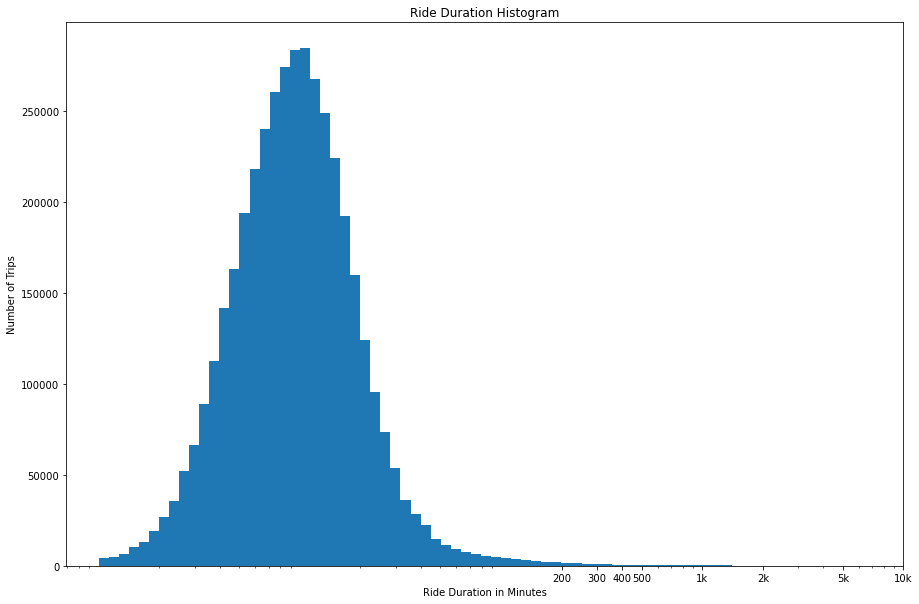

In [7]:
# Checking the data on log scale
plt.figure(figsize=(15,10))
log_bin = 10 ** np.arange(0, np.log10(rides['duration_minutes'].max()) + 0.05, 0.05)
plt.hist(data = rides, x = 'duration_minutes', bins = log_bin);
plt.title('Ride Duration Histogram');
plt.xlabel('Ride Duration in Minutes');
plt.ylabel('Number of Trips');
plt.xscale('log');
plt.xticks([200,300,400, 500, 1e3, 2e3, 5e3, 1e4], [200,300,400,500, '1k', '2k', '5k', '10k']);
print('Average Duration of Ride in Minutes:', rides.duration_minutes.mean())

## Best  Day of Ride Sharing System

> Tuesday and Thursday has the maximum number of rides/Trips while Sunday has very low number of rides as compared to other days of the week.

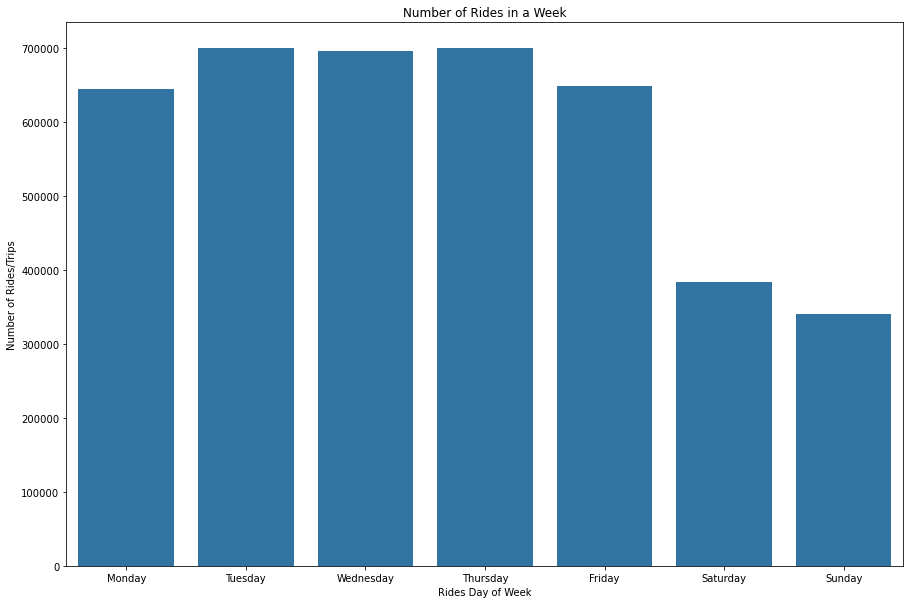

In [8]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data= rides, x = 'ride_start_day_of_week', color = color, order = order)
plt.title('Number of Rides in a Week');
plt.xlabel('Rides Day of Week');
plt.ylabel('Number of Rides/Trips');

## Best Month of Ride Sharing Usage
> October exceeded all other months in terms of number of rides while December has the lowest number of rides may be due to Christmas holidays.

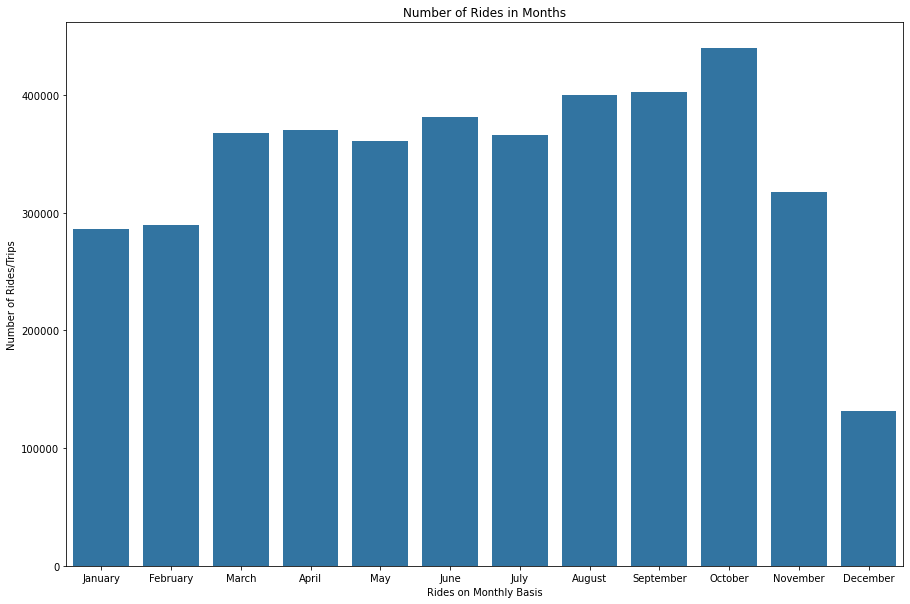

In [9]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0]
sns.countplot(data= rides, x = 'ride_start_month', color = color);
plt.title('Number of Rides in Months');
plt.xlabel('Rides on Monthly Basis');
plt.ylabel('Number of Rides/Trips');

## Ride Duration Time in a Month
> Month of June and July has maximum duration of rides with more than 14 minutes while duration of rides in February, November and December are very low as compared to other months.

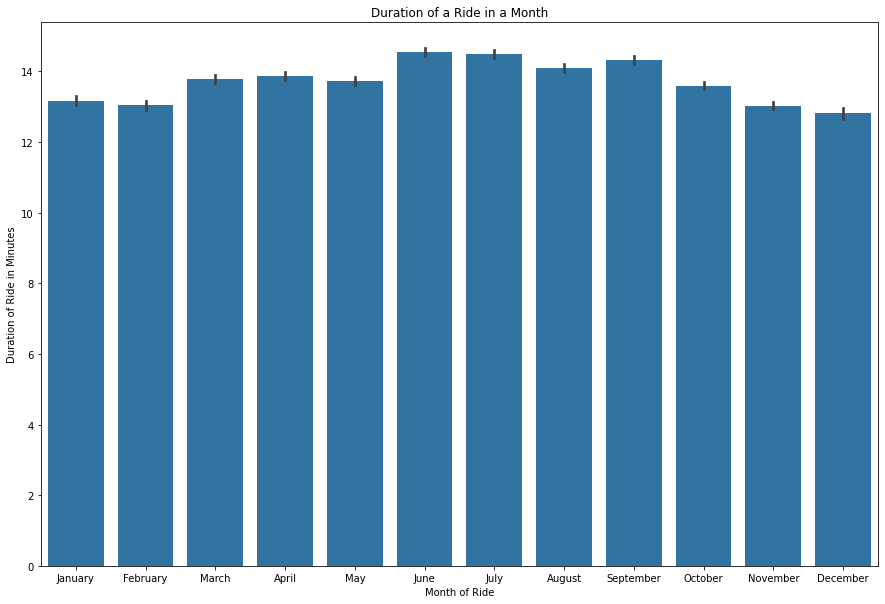

In [10]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0];
sns.barplot(data = rides, x='ride_start_month', y = 'duration_minutes' , color = color);
plt.title('Duration of a Ride in a Month');
plt.xlabel('Month of Ride');
plt.ylabel('Duration of Ride in Minutes');

## Ride Duration Time in a Day
> Average duration of a ride on Saturday and Sunday is much higher than all other days of the week.

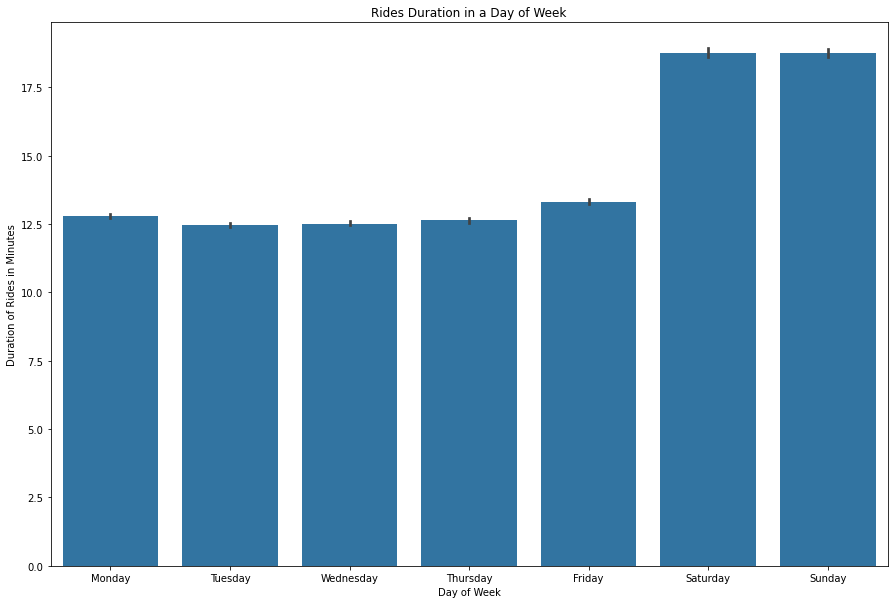

In [11]:
plt.figure(figsize=(15,10))
color = sns.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data = rides, x='ride_start_day_of_week', y = 'duration_minutes' , color = color, order= order);
plt.title('Rides Duration in a Day of Week');
plt.xlabel('Day of Week');
plt.ylabel('Duration of Rides in Minutes');

## Ride Duration of Users on Daily Basis
> Casual/Customer riders took longer rides as compared to subscribers/members while on Saturday and Sunday the average duration of casual riders are much higher than the subscribers.

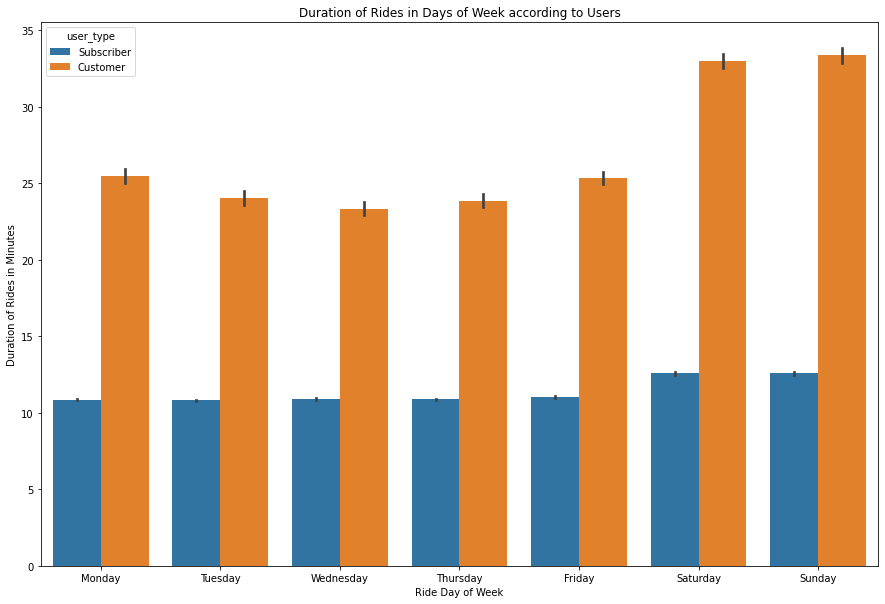

In [12]:
plt.figure(figsize=(15,10))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data = rides, x = 'ride_start_day_of_week', y= 'duration_minutes', hue = 'user_type', order = order)
plt.title('Duration of Rides in Days of Week according to Users');
plt.xlabel('Ride Day of Week');
plt.ylabel('Duration of Rides in Minutes');

## Ride Duration of Users on Monthly Basis
> The data shows that the overall in each month the number of casual riders are much higher in taking longer rides while the subsribers or membership owner riders took somehow similar duration of rides in every month as well as their duration of rides are too shorter than the casual/customer riders.

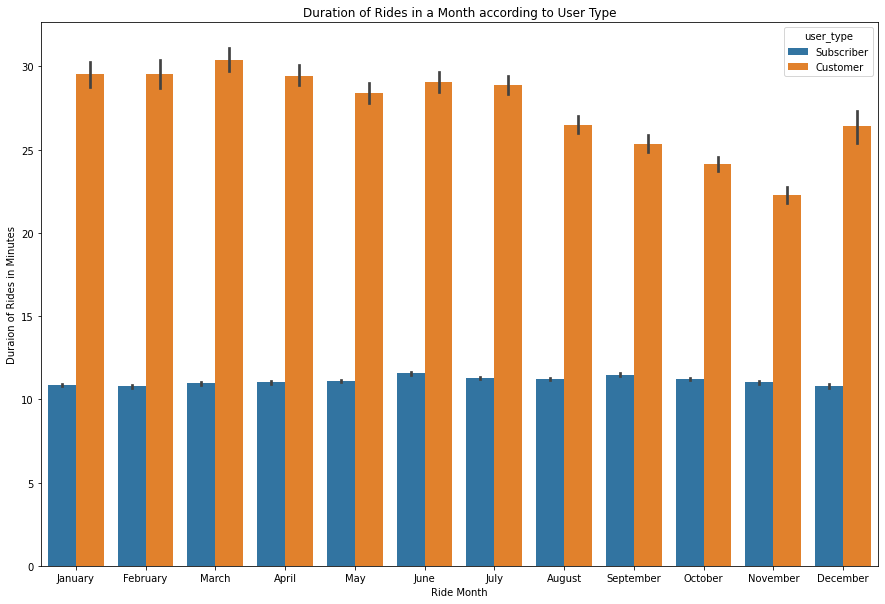

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(data = rides, x = 'ride_start_month', y= 'duration_minutes', hue = 'user_type');
plt.title('Duration of Rides in a Month according to User Type');
plt.xlabel('Ride Month');
plt.ylabel('Duraion of Rides in Minutes');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!